# Homework 1: Preprocessing and Text Classification

Student Name: Lin Li

Student ID: 964046

# General Info

<b>Due date</b>: Sunday, 5 Apr 2020 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -20% per day (both week and weekend days counted)

<b>Marks</b>: 10% of mark for class (with 9% on correctness + 1% on quality and efficiency of your code)

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/17601/pages/using-jupyter-notebook-and-python?module_item_id=1678430) on Canvas (under Modules>Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. In particular, if you are not using a lab computer which already has it installed, we recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

To familiarize yourself with NLTK, here is a free online book:  Steven Bird, Ewan Klein, and Edward Loper (2009). <a href=http://nltk.org/book>Natural Language Processing with Python</a>. O'Reilly Media Inc. You may also consult the <a href=https://www.nltk.org/api/nltk.html>NLTK API</a>.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

# Overview

In this homework, you'll be working with a collection tweets. The task is to classify whether a tweet constitutes a rumour event. This homework involves writing code to preprocess data and perform text classification.

# 1. Preprocessing (5 marks)

**Instructions**: Run the code below to download the tweet corpus for the assignment. Note: the download may take some time. **No implementation is needed.**

In [1]:
import requests
import os
from pathlib import Path

fname = 'rumour-data.tgz'
data_dir = os.path.splitext(fname)[0] #'rumour-data'

my_file = Path(fname)
if not my_file.is_file():
    url = "https://github.com/jhlau/jhlau.github.io/blob/master/files/rumour-data.tgz?raw=true"
    r = requests.get(url)

    #Save to the current directory
    with open(fname, 'wb') as f:
        f.write(r.content)
        
print("Done. File downloaded:", my_file)


Done. File downloaded: rumour-data.tgz


**Instructions**: Run the code to extract the zip file. Note: the extraction may take a minute or two. **No implementation is needed.**

In [2]:
import tarfile

#decompress rumour-data.tgz
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()

#remove superfluous files (e.g. .DS_store)
extra_files = []
for r, d, f in os.walk(data_dir):
    for file in f:
        if (file.startswith(".")):
            extra_files.append(os.path.join(r, file))
for f in extra_files:
    os.remove(f)

print("Extraction done.")

Extraction done.


### Question 1 (1.0 mark)

**Instructions**: The corpus data is in the *rumour-data* folder. It contains 2 sub-folders: *non-rumours* and *rumours*. As the names suggest, *rumours* contains all rumour-propagating tweets, while *non-rumours* has normal tweets. Within  *rumours* and *non-rumours*, you'll find some sub-folders, each named with an ID. Each of these IDs constitutes an 'event', where an event is defined as consisting a **source tweet** and its **reactions**.

An illustration of the folder structure is given below:

    rumour-data
        - rumours
            - 498254340310966273
                - reactions
                    - 498254340310966273.json
                    - 498260814487642112.json
                - source-tweet
                    - 498254340310966273.json
        - non-rumours

Now we need to gather the tweet messages for rumours and non-rumour events. As the individual tweets are stored in json format, we need to use a json parser to parse and collect the actual tweet message. The function `get_tweet_text_from_json(file_path)` is provided to do that.

**Task**: Complete the `get_events(event_dir)` function. The function should return **a list of events** for a particular class of tweets (e.g. rumours), and each event should contain the source tweet message and all reaction tweet messages.

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [3]:
import json

def get_tweet_text_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
        return data["text"]
    
def get_events(event_dir):
    
    

    event_list = []
    for event in sorted(os.listdir(event_dir)):
        ###
        # Your answer BEGINS HERE
        ###
        sub_event = []
        reactions_dir = event_dir+"/"+event+"/reactions/"
        source_tweet_dir = event_dir+"/"+event+"/source-tweet/"
        
        #Extract the file information from the reactions and source-tweet folders to event_list.
        for reaction_file in os.listdir(reactions_dir):
            file_path = reactions_dir+reaction_file
            text = get_tweet_text_from_json(file_path)
            sub_event.append(text)
        for source_tweet_file in os.listdir(source_tweet_dir):
            file_path = source_tweet_dir+source_tweet_file
            text = get_tweet_text_from_json(file_path)
            sub_event.append(text)
        event_list.append(sub_event)
        

        ###
        # Your answer ENDS HERE
        ###

        
    return event_list
    
#a list of events, and each event is a list of tweets (source tweet + reactions)    
rumour_events = get_events(os.path.join(data_dir, "rumours"))
nonrumour_events = get_events(os.path.join(data_dir, "non-rumours"))

print("Number of rumour events =", len(rumour_events))
print("Number of non-rumour events =", len(nonrumour_events))

Number of rumour events = 500
Number of non-rumour events = 1000


**For your testing:**

In [4]:
assert(len(rumour_events) == 500)
assert(len(nonrumour_events) == 1000)

### Question 2 (1.0 mark)

**Instructions**: Next we need to preprocess the collected tweets to create a bag-of-words representation. The preprocessing steps required here are: (1) tokenize each tweet into individual word tokens (using NLTK `TweetTokenizer`); and (2) remove stopwords (based on NLTK `stopwords`).

**Task**: Complete the `preprocess_events(event)` function. The function takes **a list of events** as input, and returns **a list of preprocessed events**. Each preprocessed event should have a dictionary of words and frequencies.

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [5]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from collections import defaultdict

tt = TweetTokenizer()
stopwords = set(stopwords.words('english'))


def preprocess_events(events):
    ###
    # Your answer BEGINS HERE
    ###
    preprocess_events=[]
    
    #Extract the token, from each event and count the number of each token
    for event in events:
        token_word_dct=defaultdict(int)
        for sentence in event:
            for token_word in tt.tokenize(sentence):
                #some words like "The" not in stopwords, but "the" is in, so use fuction lower().
                if token_word.lower() not in stopwords:
                    token_word_dct[token_word]+=1
        
        preprocess_events.append(token_word_dct)
        
    return preprocess_events
    
    
    
    ###
    # Your answer ENDS HERE
    ###

preprocessed_rumour_events = preprocess_events(rumour_events)
preprocessed_nonrumour_events = preprocess_events(nonrumour_events)

print("Number of preprocessed rumour events =", len(preprocessed_rumour_events))
print("Number of preprocessed non-rumour events =", len(preprocessed_nonrumour_events))

Number of preprocessed rumour events = 500
Number of preprocessed non-rumour events = 1000


**For your testing**:

In [6]:
assert(len(preprocessed_rumour_events) == 500)
assert(len(preprocessed_nonrumour_events) == 1000)

**Instructions**: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. Run the code below to collect all unique hashtags in the preprocessed data. **No implementation is needed.**



In [7]:
def get_all_hashtags(events):
    hashtags = set([])
    for event in events:
        for word, frequency in event.items():
            if word.startswith("#"):
                hashtags.add(word)
    return hashtags

hashtags = get_all_hashtags(preprocessed_rumour_events + preprocessed_nonrumour_events)
print("Number of hashtags =", len(hashtags))

Number of hashtags = 1829


### Question 3 (2.0 mark)

**Instructions**: Our task here to tokenize the hashtags, by implementing a reversed version of the MaxMatch algorithm discussed in class, where matching begins at the end of the hashtag and progresses backwards. NLTK has a list of words that you can use for matching, see starter code below. Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatizer before matching. When lemmatising a word, you also need to provide the part-of-speech tag of the word. You should use `nltk.tag.pos_tag` for doing part-of-speech tagging.

Note that the list of words is incomplete, and, if you are unable to make any longer match, your code should default to matching a single letter. Create a new list of tokenized hashtags (this should be a list of lists of strings) and use slicing to print out the last 20 hashtags in the list.

For example, given "#speakup", the algorithm should produce: \["#", "speak", "up"\]. And note that you do not need to delete the hashtag symbol ("#") from the tokenised outputs.

**Task**: Complete the `tokenize_hashtags(hashtags)` function by implementing a reversed MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of word tokens".

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [8]:
from nltk.corpus import wordnet
# from time import *
# begin_time = time()

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

#a list of words provided by NLTK
words = set(nltk.corpus.words.words()) 

#Change the word list to lowercase
lower_words = set([word.lower()  for word in words ]) 

from nltk.corpus import wordnet

#Since WordNetLemmatizer cannot use 'nltk.tag.pos_tag' directly, the output tag needs to be converted
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



def tokenize_hashtags(hashtags):
    ###
    # Your answer BEGINS HERE
    ###
    # a reversed version of the MaxMatch algorithm 
    hashtags_dic = dict()
    #Go through every hashtags
    for item in hashtags:
        temp_item = item
        position=0
        max_match=[]
        while len(item) > position:
            #Perform lexical restoration on the input string
            find_item = str(item[position:])
            word=lemmatizer.lemmatize(find_item, pos = get_wordnet_pos(find_item)) 
            word = word.lower()
            
            if word in lower_words:
                max_match.append(item[position:])
                item=item[:position]
                position = 0
            elif len(item[position:]) == 1:
                
                max_match.append(item[position:])
                item=item[:position]
                position = 0

            else:
                #If it does not match, the string length is +1 and the previous step is repeated    
                position+=1   
        hashtags_dic[temp_item] = list(reversed(max_match)) 

    return hashtags_dic
    ###
    # Your answer ENDS HERE
    ###


tokenized_hashtags = tokenize_hashtags(hashtags)

# end_time = time()
# run_time = end_time-begin_time
# print ('run_time：',run_time) 

print(list(tokenized_hashtags.items())[:20])

[('#class', ['#', 'class']), ('#bigbanks', ['#', 'big', 'banks']), ('#confused', ['#', 'confused']), ('#endreligionnow', ['#', 'end', 'religion', 'now']), ('#SpeakUP', ['#', 'Speak', 'UP']), ('#bbc', ['#', 'b', 'b', 'c']), ('#nomoreviolence', ['#', 'no', 'more', 'violence']), ('#filthy', ['#', 'filthy']), ('#Cop', ['#', 'Cop']), ('#Koran', ['#', 'Koran']), ('#MediaWatch', ['#', 'Me', 'di', 'aWatch']), ('#FergusonTruthers', ['#', 'Ferguson', 'T', 'rut', 'hers']), ('#SayNoToIslamophobia', ['#', 'Say', 'No', 'ToI', 'sla', 'moph', 'obi', 'a']), ("#Erdoğan's", ['#', 'Er', 'do', 'ğ', 'an', "'", 's']), ('#Lunacy', ['#', 'Lunacy']), ('#sick', ['#', 'sick']), ('#snipertime', ['#', 'sniper', 'time']), ('#AlQaida', ['#', 'Al', 'Q', 'a', 'ida']), ('#bogus', ['#', 'bogus']), ('#aweshit', ['#', 'awes', 'hit'])]


**For your testing:**

In [12]:
assert(len(tokenized_hashtags) == len(hashtags))

### Question 4 (1.0 mark)

**Instructions**: Now that we have the tokenized hashtags, we need to go back and update the bag-of-words representation for each event.

**Task**: Complete the ``update_event_bow(events)`` function. The function takes **a list of preprocessed events**, and for each event, it looks for every hashtag it has and updates the bag-of-words dictionary with the tokenized hashtag tokens. Note: you do not need to delete the counts of the original hashtags when updating the bag-of-words (e.g., if a document has "#speakup":2 in its bag-of-words representation, you do not need to delete this hashtag and its counts).

In [10]:
def update_event_bow(events):
    ###
    # Your answer BEGINS HERE
    ###
    
    
    for number, event in enumerate(events):
        temp_event = event.copy()
        for word, frequency in temp_event.items():
            if word.startswith("#"):    
                tokenized_hashtag = tokenized_hashtags[word]
                for i in tokenized_hashtag:
                    if i == '#':
                        events[number][i] = 0
                    events[number][i] += frequency
                        
                
    return events
    
    ###
    # Your answer ENDS HERE
    ###
            
update_event_bow(preprocessed_rumour_events)
update_event_bow(preprocessed_nonrumour_events)

print("Number of preprocessed rumour events =", len(preprocessed_rumour_events))
print("Number of preprocessed non-rumour events =", len(preprocessed_nonrumour_events))

Number of preprocessed rumour events = 500
Number of preprocessed non-rumour events = 1000


# Text Classification (4 marks)

### Question 5 (1.0 mark)

**Instructions**: Here we are interested to do text classification, to predict, given a tweet and its reactions, whether it is a rumour or not. The task here is to create training, development and test partitions from the preprocessed events and convert the bag-of-words representation into feature vectors.

**Task**: Using scikit-learn, create training, development and test partitions with a 60%/20%/20% ratio. Remember to preserve the ratio of rumour/non-rumour events for all your partitions. Next, turn the bag-of-words dictionary of each event into a feature vector, using scikit-learn `DictVectorizer`.

In [13]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
vectorizer = DictVectorizer()

###
# Your answer BEGINS HERE
###

#Mark all rumors as 1
data_rumour_y = [1 for i in range(len(preprocessed_rumour_events))]
#Mark all nonrumour as 0
data_nonrumour_y = [0 for i in range(len(preprocessed_nonrumour_events))]

#Merge rumor and non-rumor data
data_x = preprocessed_rumour_events + preprocessed_nonrumour_events
data_y = data_rumour_y+data_nonrumour_y

#Divide the test set by 20%
xtrain_and_xdev,xtest,ytrain_and_xdev,ytest=train_test_split(data_x,data_y,test_size=0.2,stratify=data_y)
#Divide the remaining data into training sets and validation sets
xtrain,xdev,ytrain,ydev=train_test_split(xtrain_and_xdev,ytrain_and_xdev,test_size=0.25,stratify=ytrain_and_xdev)


xtrain = vectorizer.fit_transform(xtrain)
xdev = vectorizer.transform(xdev)
xtest = vectorizer.transform(xtest)

    
###
# Your answer ENDS HERE
###

#If all the data were used to fit, the result would be 39703
print("Vocabulary size =", len(vectorizer.vocabulary_))

Vocabulary size = 27879


### Question 6 (2.0 mark)

**Instructions**: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation (hyper)parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do **not** use cross-validation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the accuracy with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output.

**Task**: Implement two text classifiers: Naive Bayes and Logistic Regression. Tune the hyper-parameters of these classifiers and print the task performance for different hyper-parameter settings.

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


import numpy as np
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection import PredefinedSplit

from scipy.sparse import  vstack
###
# Your answer BEGINS HERE
###

#Define model
NB = MultinomialNB()
LR = LogisticRegression()

#handle data，merge training set and validation set
combine_xtrain = vstack((xtrain,xdev))
combine_ytrain = ytrain+ydev

#Initialize all index to 0,0 to represent the first round of the validation set
test_fold = np.zeros(combine_xtrain.shape[0])  

#Set the corresponding index of the training set to -1, indicating that it will never be divided into the verification set
test_fold[:xtrain.shape[0]] = -1    

#Provides train/dev indices to split data into train/dev sets
ps = PredefinedSplit(test_fold=test_fold)  

#Set the parameters to be searched by linear regression
LR_param_grid = [
  {'C': np.linspace(0.1, 5, 200),"max_iter":[500] }
 ]

#use GridSearchCV to find the best param, cross-validation was not used because the training set and validation set were fixed
#Initialize the GridSearch
LR_grid_search = GridSearchCV(LR,LR_param_grid,n_jobs=-1,cv=ps,scoring='accuracy')
LR_grid_search.fit(combine_xtrain, combine_ytrain)


#Set the parameters to be searched by MultinomialNB
NB_param_grid = [
  {'alpha': np.linspace(0, 5, 200)}
 ]
NB_grid_search = GridSearchCV(NB,NB_param_grid,n_jobs=-1,cv=ps,scoring='accuracy')
NB_grid_search.fit(combine_xtrain, combine_ytrain)




print("LR_best_estimator_",LR_grid_search.best_estimator_)
print()
print("LR_best_score",LR_grid_search.best_score_)
print()
print("LR_params",LR_grid_search.cv_results_["params"])
print()
print("LR_test_score",LR_grid_search.cv_results_["split0_test_score"])
print()

print("________________________________________________________________________")
print()
print("NB_best_estimator_",NB_grid_search.best_estimator_)
print()
print("NB_best_score",NB_grid_search.best_score_)
print()
print("NB_params",NB_grid_search.cv_results_["params"])
print()
print("NB_test_score",NB_grid_search.cv_results_["split0_test_score"])
print()



    
    
###
# Your answer ENDS HERE
###

LR_best_estimator_ LogisticRegression(C=0.3216080402010051, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LR_best_score 0.82

LR_params [{'C': 0.1, 'max_iter': 500}, {'C': 0.12462311557788945, 'max_iter': 500}, {'C': 0.1492462311557789, 'max_iter': 500}, {'C': 0.17386934673366836, 'max_iter': 500}, {'C': 0.19849246231155782, 'max_iter': 500}, {'C': 0.22311557788944725, 'max_iter': 500}, {'C': 0.2477386934673367, 'max_iter': 500}, {'C': 0.2723618090452261, 'max_iter': 500}, {'C': 0.2969849246231156, 'max_iter': 500}, {'C': 0.3216080402010051, 'max_iter': 500}, {'C': 0.3462311557788945, 'max_iter': 500}, {'C': 0.37085427135678395, 'max_iter': 500}, {'C': 0.3954773869346734, 'max_iter': 500}, {'C': 0.4201005025125628, 'max_iter': 500}, {'

NB_best_estimator_ MultinomialNB(alpha=1.256281407035176, class_prior=None, fit_prior=True)

NB_best_score 0.8433333333333334


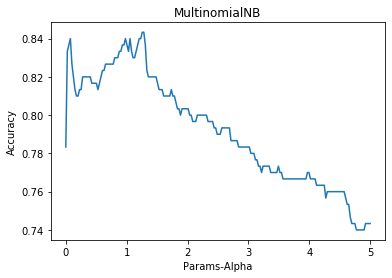

In [15]:
#draw
import matplotlib.pyplot as plt
x = [alpha['alpha']  for alpha in NB_grid_search.cv_results_["params"]]
y = [ score for score in NB_grid_search.cv_results_["split0_test_score"] ]
plt.figure()
plt.plot(x,y)
plt.xlabel('Params-Alpha')
plt.ylabel('Accuracy')
plt.title('MultinomialNB')

print("NB_best_estimator_",NB_grid_search.best_estimator_)
print()
print("NB_best_score",NB_grid_search.best_score_)

LR_best_estimator_ LogisticRegression(C=0.3216080402010051, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LR_best_score 0.82


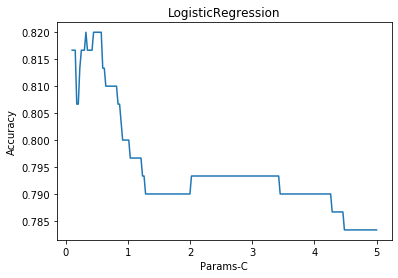

In [16]:
import matplotlib.pyplot as plt
x = [C['C']  for C in LR_grid_search.cv_results_["params"]]
y = [ score for score in LR_grid_search.cv_results_["split0_test_score"] ]
plt.figure()
plt.plot(x,y)
plt.xlabel('Params-C')
plt.ylabel('Accuracy')
plt.title('LogisticRegression')


print("LR_best_estimator_",LR_grid_search.best_estimator_)
print()
print("LR_best_score",LR_grid_search.best_score_)

### Question 7 (1.0 mark)

**Instructions**: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both accuracy and macro-averaged F-score for each classifier. Be sure to label your output.

**Task**: Compute test performance in terms of accuracy and macro-averaged F-score for both Naive Bayes and Logistic Regression, using optimal hyper-parameter settings.

In [17]:
###
# Your answer BEGINS HERE
###
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Define the model using the best parameters
NB_best_params = MultinomialNB(alpha=NB_grid_search.best_params_['alpha'])
LR_best_params = LogisticRegression(C=LR_grid_search.best_params_['C'],max_iter=LR_grid_search.best_params_['max_iter'])

#Use the training set to train the model
LR_best_params.fit(combine_xtrain, combine_ytrain)
NB_best_params.fit(combine_xtrain, combine_ytrain)

#Using test sets to predict categories
LR_y_pred = LR_best_params.predict(xtest)
NB_y_pred = NB_best_params.predict(xtest)

#Print the performance on the test sets
print("LR_test_result:\n",classification_report(ytest, LR_y_pred))
print("NB_test_result:\n",classification_report(ytest, NB_y_pred))


    
###
# Your answer ENDS HERE
###

LR_test_result:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       200
           1       0.75      0.61      0.67       100

    accuracy                           0.80       300
   macro avg       0.79      0.76      0.77       300
weighted avg       0.80      0.80      0.80       300

NB_test_result:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       200
           1       0.76      0.73      0.74       100

    accuracy                           0.83       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.83      0.83      0.83       300

